
# 🧠 Python Data Analysis Practice: Loan Data

This notebook contains **10 hands-on exercises** for practicing **Python, NumPy, Pandas, and Seaborn** using a synthetic `loan_data.csv` file.

---

### 📂 Dataset Info
File: `loan_data.csv`  
Rows: 10,000  
Columns: 13  
Each record represents a loan application with attributes like income, education, property area, credit history, and loan approval status.

---


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LN00001,Male,Yes,0,Graduate,No,19606,4057,646,84,0.0,Semiurban,Y
1,LN00002,Female,Yes,1,Graduate,Yes,12456,5320,514,60,1.0,Rural,Y
2,LN00003,Male,No,1,Graduate,No,11725,326,92,84,0.0,Rural,Y
3,LN00004,Male,Yes,0,Not Graduate,Yes,10983,122,333,84,1.0,Semiurban,Y
4,LN00005,Male,No,0,Graduate,No,9748,5127,216,84,1.0,Urban,Y


### 1️⃣ Load the dataset and display its shape, info, and first 5 rows.

In [1]:
import pandas as pd 
df = pd.read_csv('loan_data (1).csv')
print('Shape:', df.shape)
print('\ninfo: ')
print(df.info())
df.head(5)


Shape: (10000, 13)

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            10000 non-null  object 
 1   Gender             10000 non-null  object 
 2   Married            10000 non-null  object 
 3   Dependents         10000 non-null  object 
 4   Education          10000 non-null  object 
 5   Self_Employed      10000 non-null  object 
 6   ApplicantIncome    10000 non-null  int64  
 7   CoapplicantIncome  10000 non-null  int64  
 8   LoanAmount         10000 non-null  int64  
 9   Loan_Amount_Term   10000 non-null  int64  
 10  Credit_History     10000 non-null  float64
 11  Property_Area      10000 non-null  object 
 12  Loan_Status        10000 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1015.8+ KB
None


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LN00001,Male,Yes,0,Graduate,No,19606,4057,646,84,0.0,Semiurban,Y
1,LN00002,Female,Yes,1,Graduate,Yes,12456,5320,514,60,1.0,Rural,Y
2,LN00003,Male,No,1,Graduate,No,11725,326,92,84,0.0,Rural,Y
3,LN00004,Male,Yes,0,Not Graduate,Yes,10983,122,333,84,1.0,Semiurban,Y
4,LN00005,Male,No,0,Graduate,No,9748,5127,216,84,1.0,Urban,Y


### 2️⃣ Check for missing values and handle them appropriately (if any).

In [2]:
df.isnull().sum()
df.fillna(df.median(numeric_only = True), inplace= True)


### 3️⃣ Find the mean, median, and standard deviation of the LoanAmount column.

In [3]:
Mean = df.LoanAmount.mean()
Median = df.LoanAmount.median()
STD = df.LoanAmount.std()

print(f' Mean: {Mean}, Median: {Median}, STD: {STD}')

 Mean: 374.7789, Median: 374.0, STD: 188.81999765369468


### 4️⃣ Using NumPy, normalize the ApplicantIncome column and plot its distribution.

<Axes: xlabel='NormalizedIncome', ylabel='Count'>

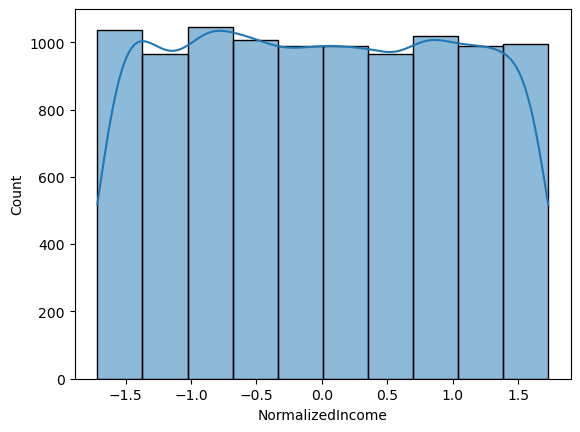

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
df['NormalizedIncome'] = (df['ApplicantIncome'] - np.mean(df['ApplicantIncome'])) / np.std(df['ApplicantIncome'])
sns.histplot(df['NormalizedIncome'], bins=10, kde=True)


### 5️⃣ Filter applicants with income above the mean who got their loan approved.

In [22]:
High_income = df[df['ApplicantIncome'] > df['ApplicantIncome'].mean()]
Approved_loan = High_income[High_income['Loan_Status']== 'Y']
Approved_loan.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NormalizedIncome
0,LN00001,Male,Yes,0,Graduate,No,19606,4057,646,84,0.0,Semiurban,Y,1.655756
1,LN00002,Female,Yes,1,Graduate,Yes,12456,5320,514,60,1.0,Rural,Y,0.286510
2,LN00003,Male,No,1,Graduate,No,11725,326,92,84,0.0,Rural,Y,0.146522
3,LN00004,Male,Yes,0,Not Graduate,Yes,10983,122,333,84,1.0,Semiurban,Y,0.004426
5,LN00006,Female,Yes,0,Graduate,No,15560,8193,449,36,1.0,Semiurban,Y,0.880935


### 6️⃣ Group by Education and Property_Area to find the average LoanAmount.

In [26]:

grouped = df.groupby(['Education', 'Property_Area'])['LoanAmount'].mean().reset_index()
grouped

,Education,Property_Area,LoanAmount
0,Graduate,Rural,378.576648
1,Graduate,Semiurban,372.634528
2,Graduate,Urban,376.079577
3,Not Graduate,Rural,362.580705
4,Not Graduate,Semiurban,384.678171
5,Not Graduate,Urban,368.296731


### 7️⃣ Visualize Loan_Status count by Gender using a Seaborn barplot.

<Axes: xlabel='Gender', ylabel='count'>

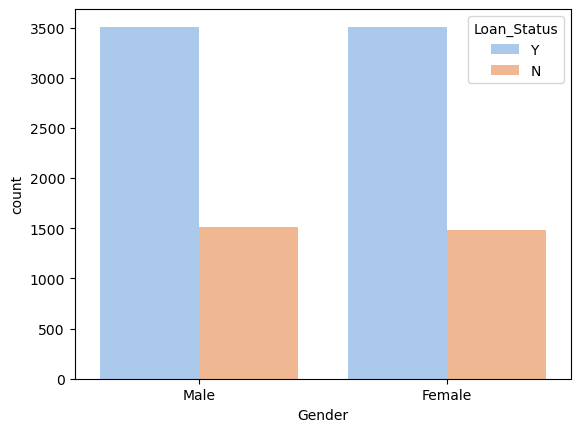

In [34]:
sns.countplot(df, x = 'Gender', hue = "Loan_Status" , palette= 'pastel')

### 8️⃣ Create a boxplot of ApplicantIncome vs Loan_Status.

Text(0.5, 1.0, 'ApplicantIncome vs Loan_Status')

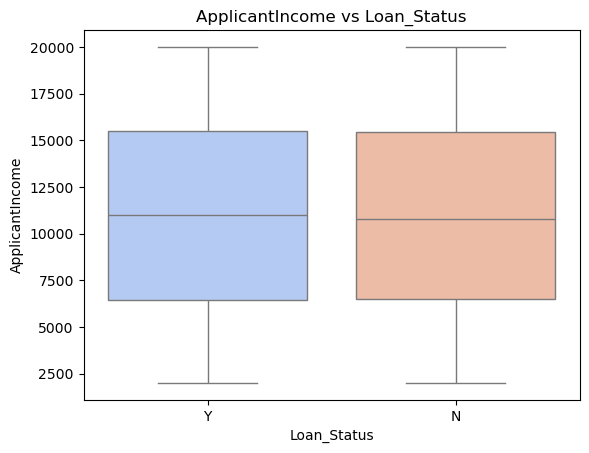

In [42]:
sns.boxplot(df, x = 'Loan_Status', y = 'ApplicantIncome', hue = 'Loan_Status', palette='coolwarm')
plt.title('ApplicantIncome vs Loan_Status')